# Clustering de usuarios
Agrupar a los usuarios en función de las funciones de las matrices de similitud generadas

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score

In [2]:
users = pd.read_csv('data/Prado_users_similarity_OnePolarity.csv', index_col=0)
##users = pd.read_csv('data/Prado_users_similarity.csv', index_col=0)
prado_users = pd.read_csv('data/Prado_users_scaled.csv', index_col=0)

## 1. Número óptimo de clusters

In [5]:
%%capture output
K_MAX = 11
davies_boulding = np.zeros(K_MAX-1)

for k in range(1, K_MAX):
    km = KMedoids(metric='precomputed', n_clusters=k)
    km.fit(users)
    davies_boulding[k-1] = davies_bouldin_score(users, km.labels_)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

[2.5113492  5.19858712 2.95818749 2.2583727  4.02425194 3.1082991
 3.88898984 2.63176403 4.1799833 ]


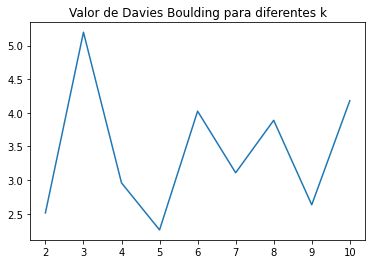

In [7]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

print(davies_boulding)
plt.show()

In [8]:
min_val = np.min(davies_boulding)
min_arg = np.argmin(davies_boulding)

print("Min: {}, Arg: {}, Val: {}".format(min_val, min_arg, range(2, K_MAX)[min_arg]))

Min: 2.2583726975841665, Arg: 3, Val: 5


## 2. Clustering

In [6]:
%%capture output

kmedoids = KMedoids(metric='precomputed', n_clusters=5)

kmedoids.fit(users)

In [10]:
import collections
collections.Counter(kmedoids.labels_)

Counter({2: 38, 0: 51, 4: 18, 1: 38, 3: 26})

In [4]:
kmedoids.medoid_indices_

array([144,  98, 111, 152, 115], dtype=int64)

In [12]:
davies_bouldin_score(prado_users, kmedoids.labels_)

2.9951688158240817

In [14]:
def add_medoids(data):
  medoids = np.empty(len(data))
  for i in range(len(data)):
    for idx, m in enumerate(kmedoids.medoid_indices_):
      if i == m:
        medoids[i] = idx
        break
      else:
        medoids[i] = -1
  return medoids

In [15]:
users_clustered = pd.read_csv("data/Prado_users.csv")
users_clustered['cluster'] = kmedoids.labels_
users_clustered['medoid'] = add_medoids(users_clustered)

users_scaled_clustered = pd.read_csv("data/Prado_users_scaled.csv")
users_scaled_clustered['cluster'] = kmedoids.labels_
users_scaled_clustered['medoid'] = add_medoids(users_scaled_clustered)

In [16]:
users_clustered.to_csv("data/Prado_users_clusters_OnePolarity.csv", index=0)
users_scaled_clustered.to_csv("data/Prado_users_scaled_clusters_OnePolarity.csv", index=0)

In [12]:
#### EXPLICADOR
users_explicador_clustered = pd.read_csv("data/Prado_users_individuo_explicador.csv")
users_explicador_clustered['cluster'] = kmedoids.labels_
users_explicador_clustered['medoid'] = add_medoids(users_explicador_clustered)

users_explicador_clustered.to_csv("data/Prado_users_explicador_clusters.csv", index=0)

## ------

In [16]:
%%capture output
km = KMedoids(metric='precomputed', n_clusters=2)
km.fit(users)

In [18]:
km.medoid_indices_

array([140, 129], dtype=int64)

## ------

In [27]:
def show_clusters(data, labels):
  palette = sns.color_palette('hls', n_colors=len(set(labels)))
  sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
  plt.axis('off')
  plt.show()

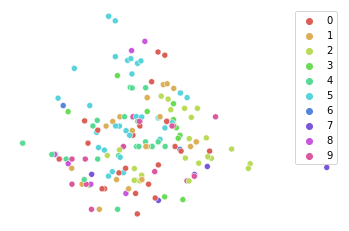

In [28]:
show_clusters(users, km.labels_)